# Problem 1

We can evaluate combinatorics such as
$$
\left( \begin{array}{c} 5\\ 3\end{array}\right) = \frac{5!}{3! (5-3)!} = \frac{120}{6 \cdot 2} = 10
$$
in R with the "choose" function `choose(5,3)`.

Try it in the next cell.

In [1]:
# Your code here
choose(5, 3)

[1] 10

R also has a factorial function.

In [2]:
# Run this cell
factorial(5)/(factorial(3)*factorial(2))

[1] 10

Suppose that $X$ has the binomial distribution with parameters $n=8$ and $p=0.3$. That is, suppose that $X \sim bin (8,0.3)$.

In the next cell, find P(X=2) using the probability mass function that you learned about in this module.

In [3]:
# Your code here
choose(8, 2) * 0.3^2 * (1-0.3)^(8-2)

[1] 0.2964755

R has several built-in probability mass functions. For example, for $X \sim bin(n,p)$, $P(X=x)$ can be computed by typing `dbinom(x,n,p)`. IN the next cell, confirm your previous calculation of $P(X=2)$ for $X \sim bin(8,0.3)$ by using this function.

In [4]:
# Your code here
dbinom(2, 8, 0.3)

[1] 0.2964755

Suppose that  $X \sim bin (8,0.3)$ and we want to compute 
$$
P(X \leq 2.6) = P(X=0)+P(X=1)+P(X=2).
$$
Do this in the next cell using the dbinom function.

In [5]:
# Your code here
dbinom(0,8,0.3)+dbinom(1,8,0.3)+dbinom(2,8,0.3)

[1] 0.5517738

Summing things in this way can get cumbersome. Fortunately, R has a built-in cumulative distribution function for the binomial distribution as well as many other commonly used distributions. To compute $P(X \leq x)$ for the $bin(n,p)$ distribution, we would type `pbinom(x,n,p)`. Use this in the next cell to verify your calculation of $P(X \leq 2.6)$ when $X \sim bin(8,0.3)$.

In [6]:
# Your code here
pbinom(2.6, 8, 0.3)

[1] 0.5517738

Visit https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Distributions.html to see a list of discrete distributions whose pmfs and cdfs are available in R!

<hr>

# Problem 2

Suppose that $X$ has a Poisson distribution with parameter $\lambda = 3.2$. Recall that the probability mass function is
$$
P(X=x) = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$
for $x=0,1,2,\ldots$.

Compute $P(X=5)$ using this formula an R.

In [8]:
# Your code here
(exp(-3.2)*3.2^5) / factorial(5)

[1] 0.1139794

Now, guess at the command to do this with the built-in probability mass function based on what you learned with the binomial distribution. Make sure your answers match before moving on with this lab!

In [9]:
# Your code here.
dpois(5, 3.2)

[1] 0.1139794

Use the R function for the cdf to determine, via trial and error, the smallest value of $x$ so that $P(X \leq x)$ first becomes greater than $0.9$.

In [17]:
# Your code here.
ppois(6, 3.2)

[1] 0.9553809

<hr>

# Problem Three

If you flip a coin one time and observe "Heads" can you tell whether or not the coin is fair? The answer is no. You would need to do it many times. Simulation from a distribution is an algorithm that outputs numbers. When you collect many of these numbers, the proportion of time you observe a particular number should be close to the true probability that the distribution gives to that number.

R has some built-in distribution simulation functions. To simulate 10,000 values from the $bin(8,0.3)$ distribution, we would type `rbinom(10000,8,0.3)`. In the next cell we save the output to a vector called "mysample". Write a line or two of R code to compute the proportion of 2's in the sample and compare it to the corresponding probability from Problem 1 of the lab.

In [30]:
# Run this cell
mysample = rbinom(10000,8,0.3)

# Write code here to determine the proportion of times the output is 2 
# and compare it to the true probability that $P(X=2)$.

table(mysample)[3]/10000

2 
0.2935

In [20]:
# Here is a function to tabulate the frequencies for all values
table(mysample)


mysample
   0    1    2    3    4    5    6    7    8 
 585 1915 2980 2556 1377  475   98   13    1 

In [21]:
# We can turn these into proportions as follows
table(mysample)/10000


mysample
     0      1      2      3      4      5      6      7      8 
0.0585 0.1915 0.2980 0.2556 0.1377 0.0475 0.0098 0.0013 0.0001 

There is a chance that you did not observe any 8's because these occur with a very low probability. Run the code in the next cell several times to look at some different samples. Watch the 8 come and go!

In [33]:
# Run this cell several times
mysample = rbinom(10000,8,0.3)
table(mysample)/10000


mysample
     0      1      2      3      4      5      6      7      8 
0.0535 0.2002 0.2951 0.2571 0.1366 0.0455 0.0107 0.0011 0.0002 

Let's make a histogram of the last sample we generated. We will make the base of each rectangle 1 unit wide and centered on the corresponding number. We will also use "prob=T" to make the height of the rectangles in a way that the total area of each rectangle is equal to the observed proportions in the sample.

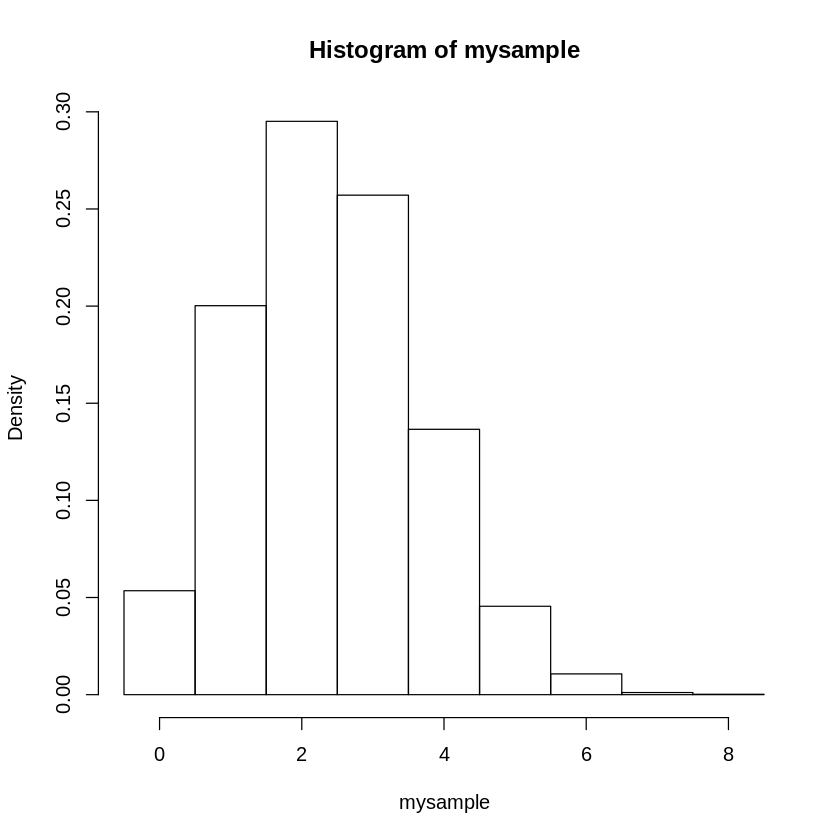

In [34]:
# Run this cell
br<-seq(-0.5,8.5,1)
hist(mysample,prob=T,breaks=br)